# TROPICAL TRENDSETTERS
### Robin Mikeal and Jef Hinton

**NOTES:**
- CLEAN DATA PREPARED IN LAST SUBMISSION
- DATA SELECTED ONLY FROM STORMS WITHIN A 500 MILE RADIUS OF TAMPA, FLORIDA

In [56]:
#pip install folium
#pip install geopandas folium  #install in terminal or command line
#pip install geopy #install in terminal or command line

In [82]:
#import modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import folium
import geopandas as gpd
from branca.element import Element
import math

In [83]:
#import clean dataset
df = pd.read_csv("GEO557Tropical_Storm_Dataset_CLEAN.csv") 
# import, get info and head to prove data exists. 
print(df.info())
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      2240 non-null   int64  
 1   Name      2240 non-null   object 
 2   BASIN     0 non-null      float64
 3   ISO_TIME  2240 non-null   object 
 4   NATURE    2240 non-null   object 
 5   LAT       2240 non-null   float64
 6   LON       2240 non-null   float64
 7   WMO WIND  1180 non-null   float64
 8   WMO PRES  1180 non-null   float64
 9   USA WIND  2240 non-null   int64  
 10  USA PRES  2240 non-null   int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 192.6+ KB
None


Year    Name  BASIN             ISO_TIME NATURE   LAT   LON  WMO WIND  \
0  2023  IDALIA    NaN  2023-08-26 12:00:00     TS  20.8 -86.1      25.0   
1  2023  IDALIA    NaN  2023-08-26 15:00:00     TS  21.1 -86.1       NaN   
2  2023  IDALIA    NaN  2023-08-26 18:00:00     TS  21.3 -86.2      25.0   
3  2023  IDALIA    NaN  2023-08-26 21:00:00     TS  21.3 -86.3       NaN   
4  2023  IDALIA    NaN  2023-08-27 00:00:00     TS  21.1 -86.4      30.0   
5  2023  IDALIA    NaN  2023-08-27 03:00:00     TS  20.8 -86.7       NaN   
6  2023  IDALIA    NaN  2023-08-27 06:00:00     TS  20.5 -86.8      30.0   
7  2023  IDALIA    NaN  2023-08-27 09:00:00     TS  20.2 -86.6       NaN   
8  2023  IDALIA    NaN  2023-08-27 12:00:00     TS  19.9 -86.3      35.0   
9  2023  IDALIA    NaN  2023-08-27 15:00:00     TS  19.9 -86.0       NaN   

   WMO PRES  USA WIND  USA PRES  
0    1006.0        25      1006  
1       NaN        25      1006  
2    1006.0        25      1006  
3       NaN        28      1005  
4    1004.0        30      1004  
5       NaN        30      1003  
6    1002.0        30      1002  
7       NaN        33      1001  
8     999.0        35       999  
9       NaN        38       998

 - This data set contains the Tropical Storms through Category 5 hurricanes that have entered the radius of 500 miles from Tampa, Florida from 2000 to 2023.
 - WMO Wind and WMO Pressure contained NaNs, so, USA WIND and USA PRES (which contain the average of the two nearest readings) have been used throughout below.
 - This study was inspired by the many devastating hurricanes that have struck this US this year.  
 - Hurricane Milton (October 2024) was not included in the National Historic Dataset at the time of the development of the code.  
 - Therefore Hurricane Milton data was downloaded directly from NOAA, but was not included in the initial analysis or cleaning and compiling.  
 - However, it is displayed as an overlay for spatial reference on the map below.


In [84]:
#import Milton overlay
Milton = pd.read_csv("MILTON_AL142024_pts.csv") 
# import, get info and head to prove data exists. 
print(Milton.info())
Milton.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   STORMNAME  22 non-null     object
 1   DTG        22 non-null     int64 
 2   YEAR       22 non-null     int64 
 3   MONTH      22 non-null     int64 
 4   DAY        22 non-null     int64 
 5   HHMM       22 non-null     int64 
 6   MSLP       22 non-null     int64 
 7   BASIN      22 non-null     object
 8   STORMNUM   22 non-null     int64 
 9   STORMTYPE  22 non-null     object
 10  INTENSITY  22 non-null     int64 
 11  SS         22 non-null     int64 
 12  LAT        22 non-null     int64 
 13  LON        22 non-null     int64 
dtypes: int64(11), object(3)
memory usage: 2.5+ KB
None


STORMNAME         DTG  YEAR  MONTH  DAY  HHMM  MSLP BASIN  STORMNUM  \
0  FOURTEEN  2024100512  2024     10    5  1200  1007    al        14   
1    MILTON  2024100518  2024     10    5  1800  1006    al        14   
2    MILTON  2024100600  2024     10    6     0  1006    al        14   
3    MILTON  2024100606  2024     10    6   600  1000    al        14   
4    MILTON  2024100612  2024     10    6  1200   991    al        14   
5    MILTON  2024100618  2024     10    6  1800   987    al        14   
6    MILTON  2024100700  2024     10    7     0   981    al        14   
7    MILTON  2024100706  2024     10    7   600   972    al        14   
8    MILTON  2024100712  2024     10    7  1200   943    al        14   
9    MILTON  2024100718  2024     10    7  1800   909    al        14   

  STORMTYPE  INTENSITY  SS  LAT  LON  
0        TD         30   0   22  -96  
1        TS         35   0   23  -96  
2        TS         35   0   23  -96  
3        TS         45   0   23  -95  
4        TS         55   0   23  -95  
5        HU         70   1   23  -94  
6        HU         75   1   23  -93  
7        HU         90   2   22  -93  
8        HU        120   4   22  -92  
9        HU        150   5   22  -91

 - The following filters were used to QA/QC the map to visualize different areas that were affected by Hurricane Force Category 1 winds,
    and winds that are equal to or greater than Category 5 winds

In [85]:
filtered_df = df[(df['USA WIND'] >= 74) & (df['USA WIND'] <= 95)]

filtered_df

Year    Name  BASIN             ISO_TIME NATURE   LAT   LON  WMO WIND  \
25    2023  IDALIA    NaN  2023-08-29 15:00:00     TS  24.5 -84.8       NaN   
26    2023  IDALIA    NaN  2023-08-29 18:00:00     TS  25.3 -84.8      80.0   
27    2023  IDALIA    NaN  2023-08-29 21:00:00     TS  26.1 -84.8       NaN   
28    2023  IDALIA    NaN  2023-08-30 00:00:00     TS  26.9 -84.7      90.0   
34    2023  IDALIA    NaN  2023-08-30 15:00:00     TS  30.9 -82.8       NaN   
...    ...     ...    ...                  ...    ...   ...   ...       ...   
2094  2004    IVAN    NaN  2004-09-06 21:00:00     TS  11.3 -55.3       NaN   
2095  2004    IVAN    NaN  2004-09-07 00:00:00     TS  11.2 -56.1      90.0   
2096  2004    IVAN    NaN  2004-09-07 03:00:00     TS  11.2 -57.0       NaN   
2097  2004    IVAN    NaN  2004-09-07 06:00:00     TS  11.3 -57.8      95.0   
2175  2004    IVAN    NaN  2004-09-16 09:00:00     TS  30.7 -87.8       NaN   

      WMO PRES  USA WIND  USA PRES  
25         NaN        75       976  
26       973.0        80       973  
27         NaN        85       969  
28       965.0        90       965  
34         NaN        80       968  
...        ...       ...       ...  
2094       NaN        90       967  
2095     964.0        90       964  
2096       NaN        93       965  
2097     965.0        95       965  
2175       NaN        90       954  

[254 rows x 11 columns]

In [86]:
rows_with_high_wind = df[df['USA WIND'] > 157]

print("Rows with 'USA WIND' greater than 157:")
print(rows_with_high_wind)


Rows with 'USA WIND' greater than 157:
      Year     Name  BASIN             ISO_TIME NATURE   LAT   LON  WMO WIND  \
670   2019  DORIAN     NaN  2019-09-01 15:00:00     TS  26.5 -76.8       NaN   
671   2019  DORIAN     NaN  2019-09-01 16:40:00     TS  26.5 -77.0     160.0   
672   2019  DORIAN     NaN  2019-09-01 18:00:00     TS  26.5 -77.1     160.0   
673   2019  DORIAN     NaN  2019-09-01 21:00:00     TS  26.5 -77.4       NaN   
1236  2005    WILMA    NaN  2005-10-19 12:00:00     TS  17.3 -82.8     160.0   

      WMO PRES  USA WIND  USA PRES  
670        NaN       158       916  
671      910.0       160       910  
672      910.0       160       910  
673        NaN       158       912  
1236     882.0       160       882  


 - The following code produces a color-blind friendly map showing the cleaned dataset (2000-2023 Storms Traveling within a 500 Mi Radius of Tampa).
 - We chose a soft rainbow palette of complimentary colors to illustrate wind intensity into bins as defined by NOAA: 
         https://www.noaa.gov/education/resource-collections/weather-atmosphere/hurricanes?os=vb_&ref=app
 - The map also includes an overlay of Hurricane Milton (2024)
 - The map is interactive.  It can be zoomed in and out, and if one clicks on the dots, a pop-up flag with data about the storm will appear.
 - The map also includes a legend, however it is not linked to the get_color function, and must be manually changed if color changes are desired.

In [87]:
# Function to determine the color based on wind speed
def get_color(wind_speed):
    if wind_speed < 74:
        return '#56B4E9'   # soft blue
    elif 74 <= wind_speed < 95:
        return '#009E73'   # deep green
    elif 95 <= wind_speed < 110:
        return '#F0E442'  # bright yellow
    elif 110 <= wind_speed < 129:
        return '#E69F00'  # warm yellow-orange
    elif wind_speed >= 129:
        return '#D55E00'   # vibrant orange

# Filter the DataFrame to include only the hurricane data with wind >= 40 mph
hurricane_path = df[df['USA WIND'] >= 40].dropna(subset=['LAT', 'LON'])

# Create a map centered around Florida with OpenStreetMap tiles
m = folium.Map(
    location=[hurricane_path['LAT'].mean(), hurricane_path['LON'].mean()],
    tiles='OpenStreetMap',
    zoom_start=4
)

# Group by 'Name' to connect points of the same hurricane
for name, group in hurricane_path.groupby('Name'):
    previous_location = None
    previous_color = None

    # Add markers for each point in the group
    for _, row in group.iterrows():
        location = [row['LAT'], row['LON']]
        popup = f"{row['Name']}<br>Wind: {row['USA WIND']} mph<br>Pressure: {row['USA PRES']} hPa"
        
        # Get the color based on the wind speed
        color = get_color(row['USA WIND'])

        # Add a circle marker for each data point
        folium.CircleMarker(
            location=location,
            radius=5,
            color=color,
            fill=True,
            fill_color=color,
            fill_opacity=0.6,
            popup=popup
        ).add_to(m)

        # Draw a polyline from the previous point to the current point, if a previous point exists
        if previous_location is not None:
            folium.PolyLine(
                locations=[previous_location, location],
                color=previous_color,  # Set line color to previous point's color
                weight=2,
                dash_array='5, 5'  # Dashed line effect
            ).add_to(m)

        # Update the previous point information
        previous_location = location
        previous_color = color

#TEST CSV Milton
def add_marker(map_obj, location, popup, color):
    folium.CircleMarker(
        location=location,
        radius=5,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.6,
        popup=popup
    ).add_to(map_obj)

for name, group in Milton.groupby('STORMNAME'):
    previous_location = None
    previous_color = None

    for _, row in group.iterrows():
        location = [row['LAT'], row['LON']]
        popup = f"{row['STORMNAME']}<br>Wind: {row['INTENSITY']} mph<br>Pressure: {row['MSLP']} hPa"
        color = get_color(row['INTENSITY'])

        add_marker(m, location, popup, color)

        if previous_location is not None:
            folium.PolyLine(
                locations=[previous_location, location],
                color='black',  # Changed line color to black
                weight=3,).add_to(m)

        previous_location = location
        previous_color = color

# Add legend for data points
legend_html = '''
<div style="position: fixed; 
     bottom: 50px; left: 50px; width: 230px; height: 160px; 
     border:2px solid grey; z-index:9999; font-size:10x;
     background-color:white;
     padding: 10x
     ">
     <b>Legend</b><br>
     &nbsp;<i class="fa fa-circle" style="color:#56B4E9"></i>&nbsp; <74 mph: Tropical Storm<br>
     &nbsp;<i class="fa fa-circle" style="color:#009E73"></i>&nbsp; 74-95 mph: Cat. 1 Hurricane<br>
     &nbsp;<i class="fa fa-circle" style="color:#F0E442"></i>&nbsp; 96-110 mph: Cat. 2 Hurricane<br>
     &nbsp;<i class="fa fa-circle" style="color:#E69F00"></i>&nbsp; 111-129 mph: Cat. 3 Hurricane<br>
     &nbsp;<i class="fa fa-circle" style="color:#D55E00"></i>&nbsp; >=130 mph: Cat. 4 Hurricane +<br>
     &nbsp;<i class="fa fa-minus" style="color:black"></i>&nbsp; Milton's Path (2024)
</div>
'''
m.get_root().html.add_child(folium.Element(legend_html))

legend = Element(legend_html)
m.get_root().add_child(legend)

# Display the map
m

This interactive follium plot shows the paths and intensities of all the storms in our study. These storm paths were selected based on, if they reached catagory 1 status, and intersected with Florida. And gathered from historical hurricane tracks https://bit.ly/3Ct3Ygw when using the interactive version of this plot you can zoom in different portions of Florida. It seems like over the last 20 years some sections of Florida have experienced multiple cat 3 hurricanes, while others have primarily recieved tropical storms.

In the last 20 years, Tampa had not experienced a direct-hit storm.  Hurricane Milton in Oct. 2024 has been the closest.  Severe wind and storm surge pose the greatest risks accompanying a direct hit.  However, storms in the past that have skirted past Tampa traveling North (i.e. Hurricane Irma) have brought immense rainfall that leads to flooding.  

Find an area of Florida that you are interested in?  Have any storms in the last 20 years hit that location directly, skirted past, or has your location been safe?  Could it be next??

There are a lot of Tropical Storms (blue color) right?  Remember that this data show the path and intensity of the storms.  What starts of blue as a Tropical Storm had to grow into at least a Cateogry 1 Hurricane to be included in this dataset.  As the hurricanes weaken, they fall back down into the blue Tropical Storm range as well.  (Or so we think....)

Lets look at some data:
 - How far do each of these storms travel?  
 - Based on the chart below, which one traveled the furthest?

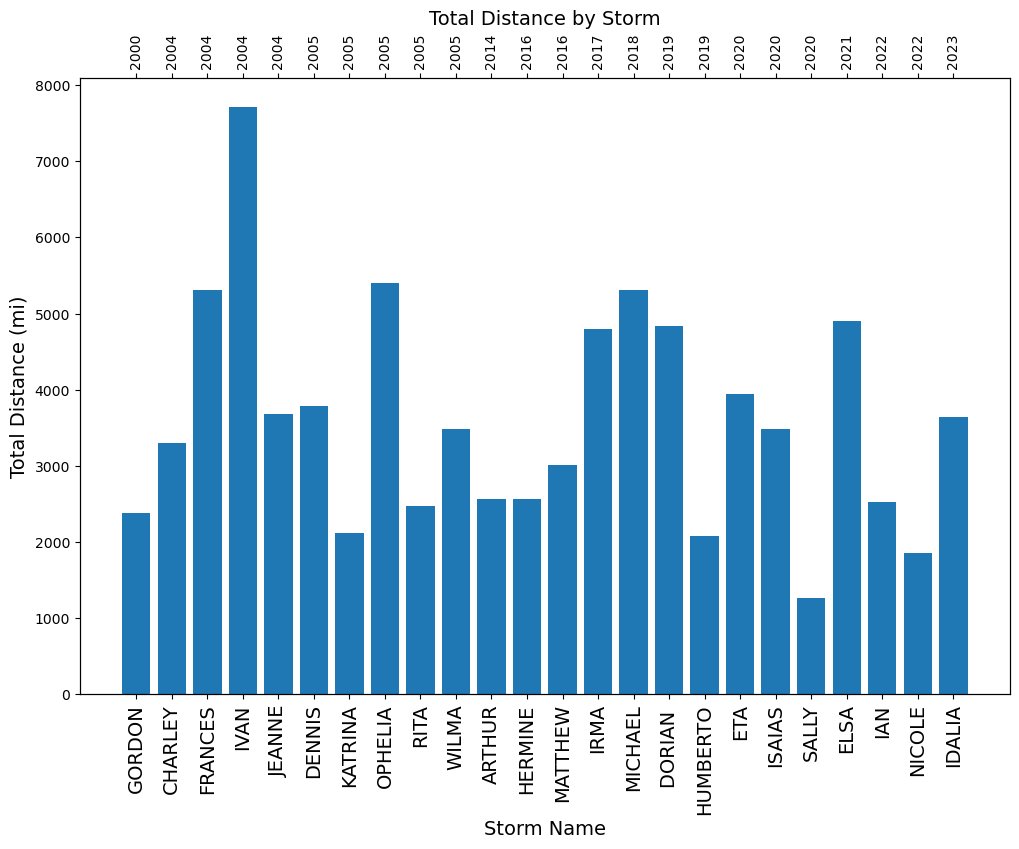

In [88]:
# Function to calculate distance between two points (latitude and longitude)
from geopy.distance import geodesic

# Function to calculate distance between two points in miles
def calculate_distance(point1, point2):
    return geodesic(point1, point2).miles

# Calculate the sum of distances by group and sort by Year
grouped = df.groupby(['Year', 'Name'])
distances = {}

for (year, name), group in grouped:
    total_distance = 0
    points = list(zip(group['LAT'], group['LON']))
    for i in range(len(points) - 1):
        total_distance += calculate_distance(points[i], points[i + 1])
    distances[(year, name)] = total_distance

# Sort distances by Year
sorted_distances = dict(sorted(distances.items(), key=lambda item: item[0]))

# Create a bar chart with vertical x-axis labels and labels of Year and Name on bars
fig, ax1 = plt.subplots(figsize=(12, 8))

bars = ax1.bar(range(len(sorted_distances)), sorted_distances.values(), tick_label=[f"{name}" for year, name in sorted_distances.keys()])
ax1.set_xlabel('Storm Name', fontsize=14)
ax1.set_ylabel('Total Distance (mi)', fontsize=14)
ax1.set_title('Total Distance by Storm', fontsize=14)
ax1.set_xticks(range(len(sorted_distances)))
ax1.set_xticklabels([f"{name}" for year, name in sorted_distances.keys()], rotation='vertical', fontsize=14)

# Add a second x-axis for the years
ax2 = ax1.twiny()
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(range(len(sorted_distances)))
ax2.set_xticklabels([f"{year}" for year, name in sorted_distances.keys()], rotation='vertical')

plt.show()


This plot shows the distance traveled by each storm. Most storms Travel less than  5000 miles, but Ivan traveled 7000+ miles. 

 - Have you ever heard of El Niño?
 - Does it affect the patterns of Hurricanes?
 
We wanted to know.  So first, El Niño-Southern Oscillation (ENSO), a natural climate pattern that involves changes in the temperature of the Pacific Ocean and the atmosphere:
El Niño: A warming of the ocean surface in the central and eastern tropical Pacific Ocean. This phase is characterized by reduced rainfall over Indonesia and increased rainfall over the central and eastern tropical Pacific Ocean.
La Niña: A cooling of the ocean surface in the central and eastern tropical Pacific Ocean. This phase is characterized by stronger east to west surface winds.
Southern Oscillation: The atmospheric counterpart to El Niño and La Niña  (SOURCE:  NOAA, 2024).

- We loaded a spreadsheet of the ENSO patterns into python as a .csv.  
- Then we merged it with our clean data to create a new column called "ENSO" in our data frame.

In [89]:
dfENSO = pd.read_csv("ENSO_Years.csv") 
# import, get info and head to prove data exists. 
print(dfENSO.info())
#dfENSO.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Year    128 non-null    int64 
 1   ENSO    128 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.1+ KB
None


In [90]:
#merge ENSO Year Table with the Hurricane Path dataframe
df2 = pd.merge(df, dfENSO, on='Year')
print(df2)

      Year    Name  BASIN             ISO_TIME NATURE   LAT   LON  WMO WIND  \
0     2023  IDALIA    NaN  2023-08-26 12:00:00     TS  20.8 -86.1      25.0   
1     2023  IDALIA    NaN  2023-08-26 15:00:00     TS  21.1 -86.1       NaN   
2     2023  IDALIA    NaN  2023-08-26 18:00:00     TS  21.3 -86.2      25.0   
3     2023  IDALIA    NaN  2023-08-26 21:00:00     TS  21.3 -86.3       NaN   
4     2023  IDALIA    NaN  2023-08-27 00:00:00     TS  21.1 -86.4      30.0   
...    ...     ...    ...                  ...    ...   ...   ...       ...   
2235  2000  GORDON    NaN  2000-09-20 18:00:00     ET  42.5 -67.2      30.0   
2236  2000  GORDON    NaN  2000-09-20 21:00:00     ET  42.7 -66.1       NaN   
2237  2000  GORDON    NaN  2000-09-21 00:00:00     ET  43.0 -65.0      30.0   
2238  2000  GORDON    NaN  2000-09-21 03:00:00     ET  43.3 -64.0       NaN   
2239  2000  GORDON    NaN  2000-09-21 06:00:00     ET  43.5 -63.0      30.0   

      WMO PRES  USA WIND  USA PRES     ENSO  
0    

It's always good to do a few checks of the data along the way to make sure everything is still working and the right records are showing up.

In [91]:
#QA Check
# Filter records for Year 2005
#records_2005 = df2[df2['Year'] == 2005]
#records_2005

# Group by Year and count unique names
#grouped_unique_count = df2.groupby('Year')['Name'].nunique().reset_index(name='Unique Name Count')
#grouped_unique_count

#print(df2.info())

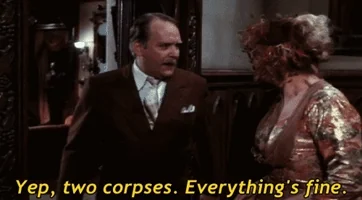

Since everything checked out, the next step involves looking at some bar charts to see temporal patterns associated with ENSO and the number of storms.

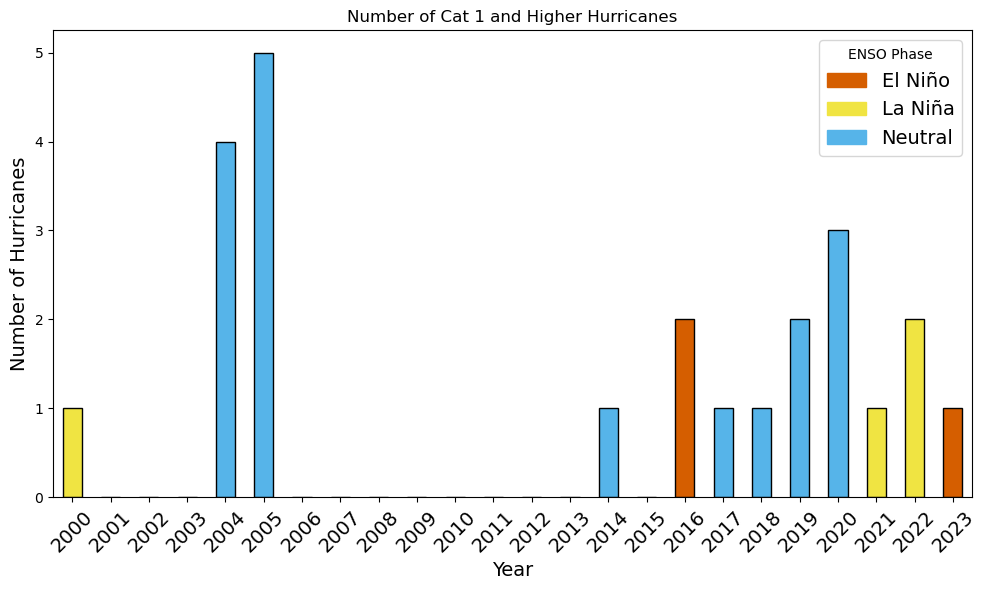

In [92]:
# Group by year and count unique storm names
storm_counts = df2.groupby('Year')['Name'].nunique()

# Create a range of years
all_years = pd.Series(range(df2['Year'].min(), df2['Year'].max() + 1), name='Year')

# Fill in missing years with 0
storm_counts = storm_counts.reindex(all_years, fill_value=0)

# Create a color map based on ENSO phases
enso_colors = {
    'El Niño': '#D55E00',
    'La Niña': '#F0E442',
    'Neutral': '#56B4E9'
}

# Map colors to the years based on ENSO phases
colors = df2.drop_duplicates('Year').set_index('Year')['ENSO'].reindex(all_years).map(enso_colors)

# Replace NaN values in colors with a default color (e.g., gray)
colors = colors.fillna('gray')

# Plot the data
plt.figure(figsize=(10, 6))
storm_counts.plot(kind='bar', color=colors, edgecolor='black')
# Label stuff
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Hurricanes', fontsize=14)
plt.title('Number of Cat 1 and Higher Hurricanes')
plt.xticks(rotation=45, fontsize=14)

# Add legend for colors
handles = [plt.Rectangle((0,0),1,1, color=color) for color in enso_colors.values()]
labels = enso_colors.keys()
plt.legend(handles, labels, title="ENSO Phase", fontsize=14)

plt.tight_layout()
plt.show()

Here's a bar chart showing the count of hurricanes per year by ENSO phase colors. The most active year was 2005 which was catagorized as Neutral. 

As you walk through these plots and datasets you'll notice a gap between 2006 and 2013 that's because according to our dataset 
there were no catagory 1 storms that intersected with Florida during those years.  

What does that suggest?
- Based on the temporal range of the data and the limited location, a visual relationship between ENSO and the number of hurricanes are not apparent.
- Longer study periods and larger geographic areas may reveal other visual trends.

It might be helpful to add another column containing the actual storm categories for purposes of more quickly and intuitively slicing the data.

So, a function was used below to define a new column based on the NOAA wind speed ranges for hurricane categories.  

In [93]:
def category(wind_speed):
    if wind_speed < 74:
        return 'Tropical Storm'   
    elif 74 >= wind_speed < 95:
        return 'Category 1'
    elif 95 >= wind_speed < 110:
        return 'Category 2'  
    elif 110 >= wind_speed < 129:
        return 'Category 3'  
    else:
        return 'Category 4+'  

# Apply the category function to create a new column
df2['Category'] = df2['USA WIND'].apply(category)

# Display the DataFrame with the new column
print(df2)

      Year    Name  BASIN             ISO_TIME NATURE   LAT   LON  WMO WIND  \
0     2023  IDALIA    NaN  2023-08-26 12:00:00     TS  20.8 -86.1      25.0   
1     2023  IDALIA    NaN  2023-08-26 15:00:00     TS  21.1 -86.1       NaN   
2     2023  IDALIA    NaN  2023-08-26 18:00:00     TS  21.3 -86.2      25.0   
3     2023  IDALIA    NaN  2023-08-26 21:00:00     TS  21.3 -86.3       NaN   
4     2023  IDALIA    NaN  2023-08-27 00:00:00     TS  21.1 -86.4      30.0   
...    ...     ...    ...                  ...    ...   ...   ...       ...   
2235  2000  GORDON    NaN  2000-09-20 18:00:00     ET  42.5 -67.2      30.0   
2236  2000  GORDON    NaN  2000-09-20 21:00:00     ET  42.7 -66.1       NaN   
2237  2000  GORDON    NaN  2000-09-21 00:00:00     ET  43.0 -65.0      30.0   
2238  2000  GORDON    NaN  2000-09-21 03:00:00     ET  43.3 -64.0       NaN   
2239  2000  GORDON    NaN  2000-09-21 06:00:00     ET  43.5 -63.0      30.0   

      WMO PRES  USA WIND  USA PRES     ENSO        

Did it work?

Now that we have a new column, it will be easier to call charts against that column and add up the number of storms based on their maximum sustained wind catorization.

Start by grouping by storm name, then finding the max wind, then grabbing the Category result. Then use a stacked bar chart to count the number of each type of storm each year.

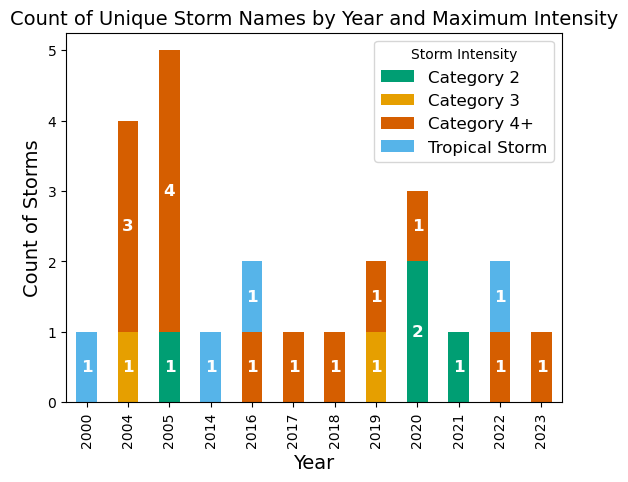

In [94]:
# Find Max Wind by name, then group by year and category, then count unique storm names
# Step 1: Find the maximum wind speed by Name
max_wind_by_name = df2.groupby('Name')['USA WIND'].max().reset_index()

# Step 2: Merge this back with the original DataFrame to keep other columns
MAX = df2.merge(max_wind_by_name, on=['Name', 'USA WIND'])

# Step 3: Group by Year and Category, then count unique Names
result = MAX.groupby(['Year', 'Category'])['Name'].nunique().unstack().fillna(0)

# Define custom color map
custom_colors = ['#009E73', '#E69F00', '#D55E00', '#56B4E9']

# Plotting the stacked bar chart with custom color map and white bold labels of counts
ax = result.plot(kind='bar', stacked=True, color=custom_colors)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count of Storms', fontsize=14)
plt.title('Count of Unique Storm Names by Year and Maximum Intensity', fontsize=14)
plt.legend(title='Storm Intensity', fontsize=12)

# Adding white bold labels of counts and removing zero labels
for container in ax.containers:
    labels = [int(v) if v > 0 else '' for v in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='center', color='white', weight='bold', fontsize=12)

plt.show()


This plot shows the year, intensity and number of storms. 2005 was the most active year with 5 storms, and 4 of them were Category 4 or higher. And like above, you can see a gap from 2006 to 2013.

Hmmm, that is interesting.  No storms reached a maximum sustained wind in the Category 1 level?  And what is this? Some tropical storms are still in this dataset?

This tells us either the website algorithm to extract the data is off (because it let some tropical storms slip in that never reached Hurricane level), or maybe their definition of the hurricane ranges was not aligned to NOAA standards, or something else... Or we have something wrong in the code.  Let's check.

In [95]:
#This is the dataframe built on the group above.  
print(max_wind_by_name)

        Name  USA WIND
0     ARTHUR        70
1    CHARLEY       130
2     DENNIS       130
3    DORIAN        160
4       ELSA        75
5        ETA       130
6    FRANCES       125
7     GORDON        70
8    HERMINE        70
9   HUMBERTO       110
10       IAN       140
11    IDALIA       115
12      IRMA       155
13    ISAIAS        80
14      IVAN       145
15    JEANNE       105
16   KATRINA       150
17   MATTHEW       145
18   MICHAEL       140
19    NICOLE        65
20   OPHELIA        75
21      RITA       155
22     SALLY        95
23     WILMA       160


In [96]:
#  Ah ha!  I see 4 storms with max wind less than the critical 74 mph!
#  Maybe the code to develop the max was wrong.  
#  So lets call out Nicole from the original dataframe
# Select the 'Name' column and sort by 'Score'
Nicole = df[df['Name'] == 'NICOLE'].sort_values(by='USA WIND')
print(Nicole)

     Year    Name  BASIN             ISO_TIME NATURE   LAT   LON  WMO WIND  \
150  2022  NICOLE    NaN  2022-11-11 18:00:00     DS  35.4 -83.8      25.0   
148  2022  NICOLE    NaN  2022-11-11 12:00:00     TS  33.2 -84.6      25.0   
149  2022  NICOLE    NaN  2022-11-11 15:00:00     TS  34.3 -84.3       NaN   
147  2022  NICOLE    NaN  2022-11-11 09:00:00     TS  32.1 -84.7       NaN   
146  2022  NICOLE    NaN  2022-11-11 06:00:00     TS  31.2 -84.6      30.0   
104  2022  NICOLE    NaN  2022-11-06 12:00:00     DS  20.6 -66.8      30.0   
145  2022  NICOLE    NaN  2022-11-11 03:00:00     TS  30.6 -84.4       NaN   
105  2022  NICOLE    NaN  2022-11-06 15:00:00     DS  21.5 -66.7       NaN   
144  2022  NICOLE    NaN  2022-11-11 00:00:00     TS  30.1 -84.0      35.0   
108  2022  NICOLE    NaN  2022-11-07 00:00:00     DS  23.9 -67.5      35.0   
107  2022  NICOLE    NaN  2022-11-06 21:00:00     DS  23.2 -67.1       NaN   
106  2022  NICOLE    NaN  2022-11-06 18:00:00     DS  22.4 -66.8

Elementary, my dear Watson.  The code is right, but the data has let in some stragglers. 
We won't worry too much about it, but at least we know there are four tropical storms in this dataset, that could be removed, if we wanted to.....
.....So let's do.
Let's get the list of the Tropical Storms, and remove them from the dataframe

In [97]:
TS = max_wind_by_name[max_wind_by_name['USA WIND'] < 74]['Name'].tolist()
print(TS)

['ARTHUR', 'GORDON', 'HERMINE', 'NICOLE']


In [98]:
df3 = df2[~df2['Name'].isin(['ARTHUR', 'GORDON', 'HERMINE', 'NICOLE'])]
df3

Year    Name  BASIN             ISO_TIME NATURE   LAT   LON  WMO WIND  \
0     2023  IDALIA    NaN  2023-08-26 12:00:00     TS  20.8 -86.1      25.0   
1     2023  IDALIA    NaN  2023-08-26 15:00:00     TS  21.1 -86.1       NaN   
2     2023  IDALIA    NaN  2023-08-26 18:00:00     TS  21.3 -86.2      25.0   
3     2023  IDALIA    NaN  2023-08-26 21:00:00     TS  21.3 -86.3       NaN   
4     2023  IDALIA    NaN  2023-08-27 00:00:00     TS  21.1 -86.4      30.0   
...    ...     ...    ...                  ...    ...   ...   ...       ...   
2180  2004    IVAN    NaN  2004-09-23 21:00:00     TS  29.4 -92.9       NaN   
2181  2004    IVAN    NaN  2004-09-24 00:00:00     TS  29.6 -93.2      30.0   
2182  2004    IVAN    NaN  2004-09-24 02:00:00     TS  29.8 -93.6      30.0   
2183  2004    IVAN    NaN  2004-09-24 03:00:00     TS  29.9 -93.8       NaN   
2184  2004    IVAN    NaN  2004-09-24 06:00:00     TS  30.1 -94.2      25.0   

      WMO PRES  USA WIND  USA PRES     ENSO        Category  
0       1006.0        25      1006  El Niño  Tropical Storm  
1          NaN        25      1006  El Niño  Tropical Storm  
2       1006.0        25      1006  El Niño  Tropical Storm  
3          NaN        28      1005  El Niño  Tropical Storm  
4       1004.0        30      1004  El Niño  Tropical Storm  
...        ...       ...       ...      ...             ...  
2180       NaN        35      1003  Neutral  Tropical Storm  
2181    1003.0        30      1003  Neutral  Tropical Storm  
2182    1004.0        30      1004  Neutral  Tropical Storm  
2183       NaN        29      1005  Neutral  Tropical Storm  
2184    1009.0        25      1009  Neutral  Tropical Storm  

[1956 rows x 13 columns]

Much better, now let's proceed!

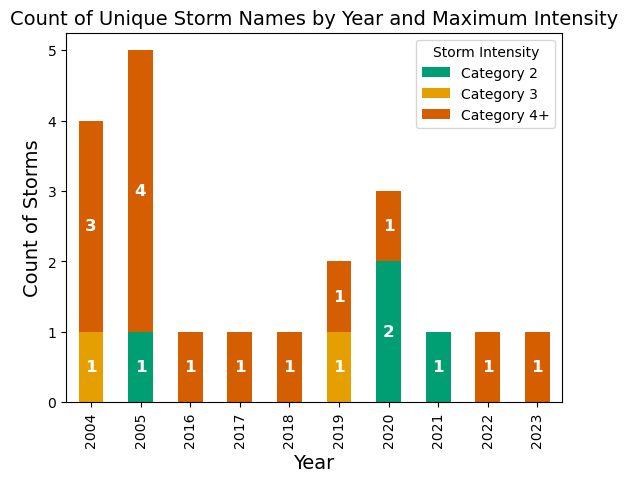

In [99]:
# Find Max Wind by name, then group by year and category, then count unique storm names
# Step 1: Find the maximum wind speed by Name
max_wind_by_name2 = df3.groupby('Name')['USA WIND'].max().reset_index()

# Step 2: Merge this back with the original DataFrame to keep other columns
MAX2 = df3.merge(max_wind_by_name2, on=['Name', 'USA WIND'])

# Step 3: Group by Year and Category, then count unique Names
result2 = MAX2.groupby(['Year', 'Category'])['Name'].nunique().unstack().fillna(0)

# Define custom color map
custom_colors = ['#009E73', '#E69F00', '#D55E00', '#56B4E9']

# Plotting the stacked bar chart with custom color map and white bold labels of counts
ax = result2.plot(kind='bar', stacked=True, color=custom_colors)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count of Storms', fontsize=14)
plt.title('Count of Unique Storm Names by Year and Maximum Intensity', fontsize=14)
plt.legend(title='Storm Intensity')

# Adding white bold labels of counts and removing zero labels
for container in ax.containers:
    labels = [int(v) if v > 0 else '' for v in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='center', color='white', weight='bold', fontsize=12)

plt.show()


Great!  That is better.  Now let's look at how long each of these stoms last.

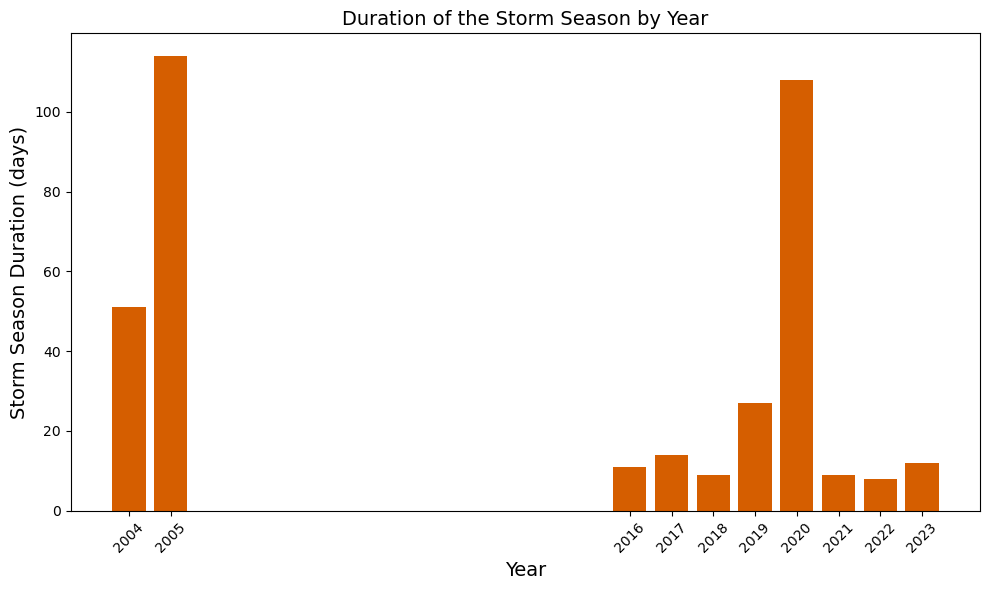

In [100]:
# Convert the 'ISO_TIME' column to datetime using assign to avoid the warning
df3 = df3.assign(ISO_TIME=pd.to_datetime(df3['ISO_TIME']))

# Group by year and calculate the duration of the storm season
season_durations = df3.groupby('Year')['ISO_TIME'].agg(['min', 'max'])
season_durations['Duration'] = (season_durations['max'] - season_durations['min']).dt.days

# Plot the duration of the storm season for each year
plt.figure(figsize=(10, 6))
plt.bar(season_durations.index, season_durations['Duration'], color='#D55E00')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Storm Season Duration (days)', fontsize=14)
plt.title('Duration of the Storm Season by Year', fontsize=14)
plt.grid(False)
plt.xticks(season_durations.index, rotation=45)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}'))
plt.tight_layout()
plt.show()

Duration of storm season by year was calculated by counting the number of days from the first day we started tracking the first storm, until the day the last storm of the season ended. We learned 2005 was an especially active year above with 5 hurricanes, so it is reasonable that 2005 also had the longest storm season. 

So does El Niño and the ENSO patterns have a relationship with any other measured data from the hurricanes?

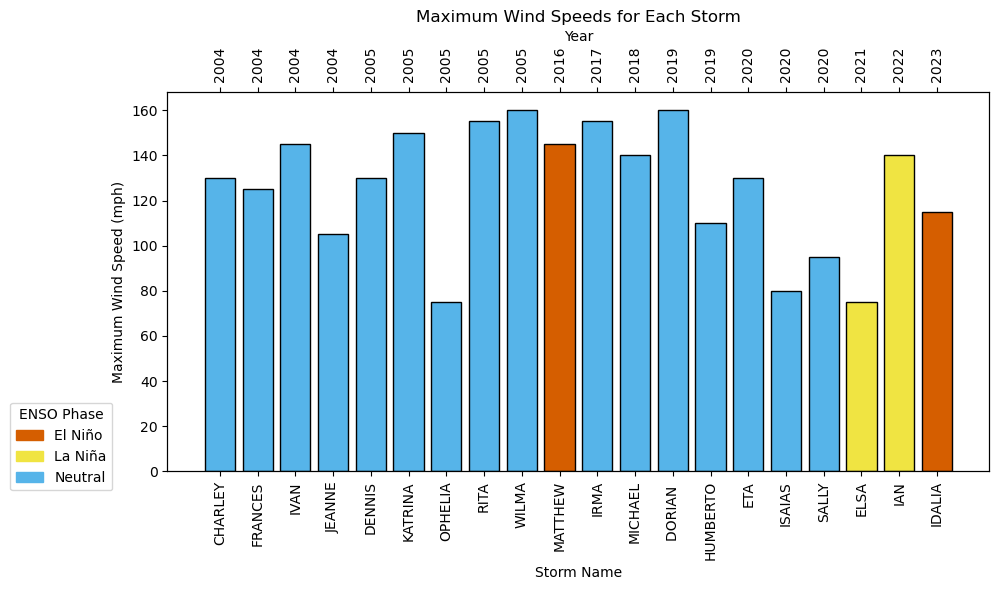

In [101]:
# Group by storm name and get the maximum wind speed for each storm
max_wind_speeds = df3.groupby(['Year', 'Name'])['WMO WIND'].max().reset_index()

# Sort by year
max_wind_speeds = max_wind_speeds.sort_values(by='Year')

# Create a color map based on ENSO phases
enso_colors = {
    'El Niño': '#D55E00',
    'La Niña': '#F0E442',
    'Neutral': '#56B4E9'
}

# Map colors to the years based on ENSO phases
colors = df3.drop_duplicates('Year').set_index('Year')['ENSO'].map(enso_colors)

# Replace NaN values in colors with a default color (e.g., gray)
colors = colors.fillna('gray')

# Ensure the colors Series is aligned with the max_wind_speeds index
colors = colors.reindex(max_wind_speeds['Year']).values

# Plot the data
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the maximum wind speeds
bars = ax1.bar(max_wind_speeds['Name'], max_wind_speeds['WMO WIND'], color=colors, edgecolor='black')

# Label stuff for the first axis
ax1.set_xlabel('Storm Name')
ax1.set_ylabel('Maximum Wind Speed (mph)')
ax1.set_title('Maximum Wind Speeds for Each Storm')
ax1.tick_params(axis='x', rotation=90)

# Add legend for colors
handles = [plt.Rectangle((0,0),1,1, color=color) for color in enso_colors.values()]
labels = enso_colors.keys()
plt.legend(handles, labels, title="ENSO Phase", loc='upper left', bbox_to_anchor=(-0.2, 0.2))

# Create a second x-axis to show the year labels
ax2 = ax1.twiny()

# Set the second x-axis limits to match the first x-axis
ax2.set_xlim(ax1.get_xlim())

# Set the second x-axis ticks and labels to show the years
ax2.set_xticks(range(len(max_wind_speeds)))
ax2.set_xticklabels(max_wind_speeds['Year'], rotation=90)

# Set the second x-axis label
ax2.set_xlabel('Year')

plt.tight_layout()
plt.show()

Here is a plot of maximum wind speed per hurricane, and we're differentiating between El Niño, La Niña and neutral. Based on this chart and sample size, no visible relationship appears that may link El Niño or La Niña with stronger wind speeds or more storms.  Additional temporal analysis may with historic and future weather data, and a more widespread geographic footprint may reveal more apparent visual patterns. 

Do any of the data show an obvious relationship?  Yes!  Wind speed and atmospheric pressure!  Check out this linear regression using seaborn.

In [102]:
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [103]:
nans_in_columns = df2.isna().sum()
print(nans_in_columns)

Year           0
Name           0
BASIN       2240
ISO_TIME       0
NATURE         0
LAT            0
LON            0
WMO WIND    1060
WMO PRES    1060
USA WIND       0
USA PRES       0
ENSO           0
Category       0
dtype: int64


In [104]:
#we need to drop columsn that have NaNs
LR = df2.drop(columns=['BASIN'])

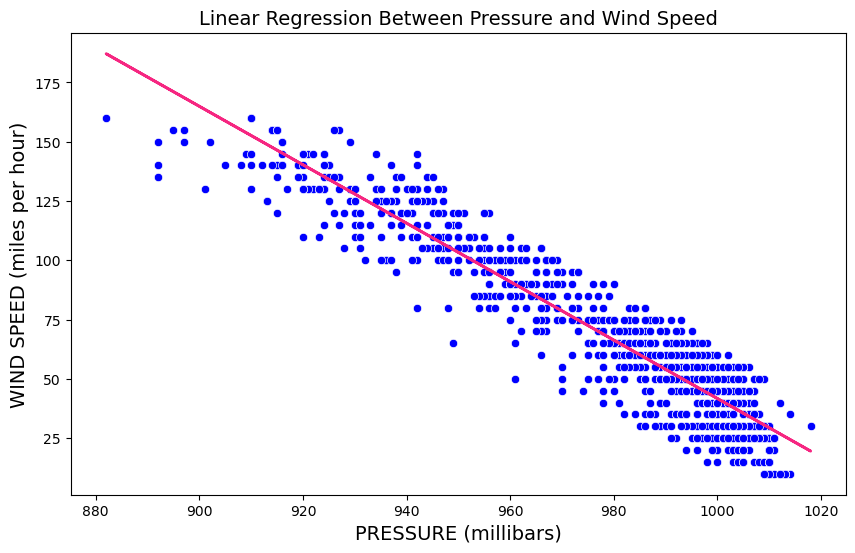

In [105]:
### Linear Regression of Pressure and Wind

# Drop rows with NaN values
LR = LR.dropna(subset=['WMO WIND', 'WMO PRES'])

# Extract the relevant columns
X = LR[['WMO PRES']]
y = LR['WMO WIND']

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict values
y_pred = model.predict(X)

# Plot the data and the regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='WMO PRES', y='WMO WIND', data=LR, color='blue')
plt.plot(LR['WMO PRES'], y_pred, color='#F62681', linewidth=2)
plt.xlabel('PRESSURE (millibars)', fontsize=14)
plt.ylabel('WIND SPEED (miles per hour)', fontsize=14)
plt.title('Linear Regression Between Pressure and Wind Speed', fontsize=14)
plt.show()


So with a linear regression plot, the relationship of wind speed and pressure is apparent. We can see a strong trend that the higher the pressure goes, the lower the windspeed goes. Or in reverse, the lower the pressure, the higher the windspeed.  Storms thrive under low pressure systems.  High pressure systems create cooler, drier weather.  This kills a storm.  Low pressure breeds warm, humid conditions.  Hurricanes love the warm water.  Thank you Oceanography and Weather & Climate Classes.

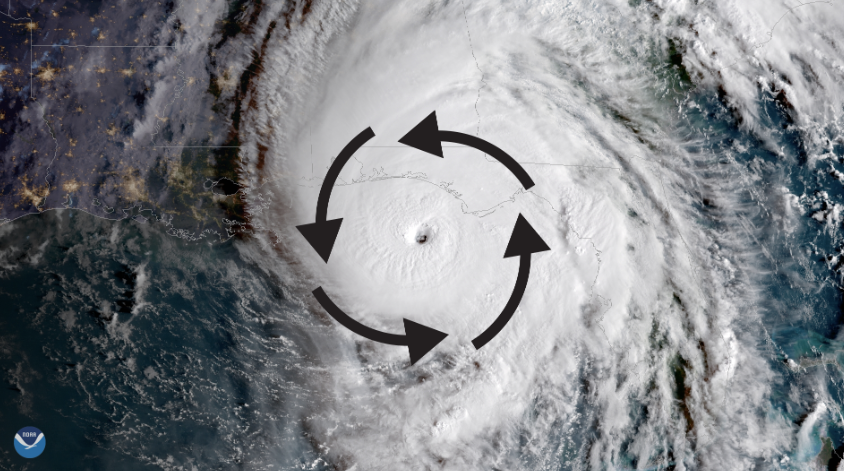

satellite image of Hurricane Michael from October 10, 2018 has arrows superimposed on top to show the closed circulation wind pattern that is characteristic of a hurricane. (NOAA Satellites/NOAA Office of Education)